#### The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country.

### Key Features in 'world-happiness-report': 

1.	Ladder score: It is the score for happiness and liveability. The high ladder score represents the best possible life for you and low ladder score represents the worst possible life for you.
2.	Logged GDP per capita: It shows how much economic production value can be attributed to each individual citizen. Alternatively, this translates to a measure of national wealth since GDP market value per person also readily serves as a prosperity measure.
3.	Social support: It is defined in terms of social network characteristics such as assistance from family, friends, neighbours and other community members.
4.	Healthy life expectancy at birth: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year
5.	Freedom to make life choices: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.
6.	Generosity Generosity is the virtue of being liberal in giving, often as gifts.
7.	Perceptions of corruption: Corruption is a form of dishonesty or criminal offense undertaken by a person or organization entrusted with a position of authority, to acquire illicit benefit


**- While a happiness report or rank might seem trivial, it is this type of data that points to our development policies and the people’s perception of how their governments perform.**

**- The report also helps in pointing out the importance of qualitative development rather than quantitative. It takes into consideration what people really think about topics such as women’s rights, corruption rates, fundamental rights and more. In a way, it is one of the most important reports for a developing economy like India.**

### Data Preparation and EDA

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Final_Combined_File.csv")

In [113]:
data.head(3)

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.8,0.718,0.168,0.882,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.2,0.679,0.190,0.850,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.600,0.121,0.707,South Asia


In [112]:
data[data.year==2021].drop('year', axis = 1).describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [109]:
# data.groupby("Country name").mean().hist(figsize=(15,8), bins = 50);

# # Distribution for average scores for each country is given below

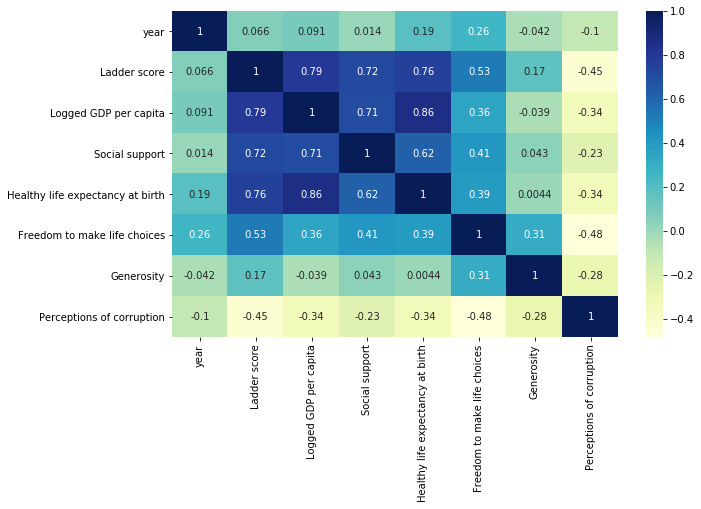

In [30]:
fig, ax = plt.subplots(figsize = [10,6])
sns.heatmap(data.corr(), annot= True, cmap = "YlGnBu");

In [114]:
# fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 8))
# sns.boxplot(data.groupby("Country name")["Ladder score"].mean(), orient='v', ax= ax[0,0]);
# sns.boxplot(data.groupby("Country name")["Logged GDP per capita"].mean(), orient='v', ax=ax[0,1]);
# sns.boxplot(data.groupby("Country name")["Social support"].mean(), ori0ent='v', ax=ax[0,2]);
# sns.boxplot(data.groupby("Country name")["Healthy life expectancy at birth"].mean(), orient='v', ax=ax[0,3]);
# sns.boxplot(data.groupby("Country name")["Freedom to make life choices"].mean(), orient='v', ax=ax[1,0]);
# sns.boxplot(data.groupby("Country name")["Generosity"].mean(), orient='v', ax=ax[1,1]);
# sns.boxplot(data.groupby("Country name")["Perceptions of corruption"].mean(), orient='v', ax=ax[1,2]);
# plt.tight_layout();
# plt.delaxes(ax[1,3]);


# # Box plot for average scores by country

## Hypothesis test

### - Dividing GDP into 2 gategories based on median value: High (>9.46000) and Low (<9.46000) and then conducting hypothesis test for perception of corrptions, social support, freedom to make life choices and life expectancy at birth by diving these data into 2 samples filtered on each GDP category


In [4]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1861 non-null   object 
 1   year                              1861 non-null   int64  
 2   Ladder score                      1861 non-null   float64
 3   Logged GDP per capita             1861 non-null   float64
 4   Social support                    1861 non-null   float64
 5   Healthy life expectancy at birth  1861 non-null   float64
 6   Freedom to make life choices      1861 non-null   float64
 7   Generosity                        1861 non-null   float64
 8   Perceptions of corruption         1861 non-null   float64
 9   Regional indicator                1861 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 145.5+ KB


#### Life Expectancy at birth and GDP T - test

In [47]:
# Life Expectancy at birth
life_lowG = data[data["Logged GDP per capita"]<9.46000]["Healthy life expectancy at birth"]
life_highG = data[data["Logged GDP per capita"]>9.46000]["Healthy life expectancy at birth"]
len(life_lowG) , len(life_highG)

(930, 929)

In [52]:
ttest,pval = stats.ttest_ind(life_lowG, life_highG)  # t-test on 2 independent samples
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.113993871580549e-271
reject null hypothesis


- Life expectancy at birth when compared for samples with GDP <9.46 and >9.46 rejects null hypothesis. It means Life expectancy at birth vary significantly for countries with lower GDP than higher.

#### Freedom to make life choices and GDP T - test

In [54]:
free_lowG = data[data["Logged GDP per capita"]<9.46000]["Freedom to make life choices"]
free_highG = data[data["Logged GDP per capita"]>9.46000]["Freedom to make life choices"]
len(free_lowG) , len(free_highG)

(930, 929)

In [55]:
ttest,pval = stats.ttest_ind(free_lowG, free_highG)  # t-test on 2 independent samples
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

5.301739118068363e-34
reject null hypothesis


- Freedom to make life choices when compared for samples with GDP <9.46 and >9.46 rejects null hypothesis. It means Freedom to make life choices vary significantly for countries with lower GDP than higher.

#### Social support and GDP T - test

In [57]:
social_lowG = data[data["Logged GDP per capita"]<9.46000]["Social support"]
social_highG = data[data["Logged GDP per capita"]>9.46000]["Social support"]
len(social_lowG) , len(social_highG)

(930, 929)

In [58]:
ttest,pval = stats.ttest_ind(social_lowG, social_highG)  # t-test on 2 independent samples
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.0434786627802876e-177
reject null hypothesis


- Social support when compared for samples with GDP <9.46 and >9.46 rejects null hypothesis. It means Social support vary significantly for countries with lower GDP than higher GDP values.

#### Perceptions of Corruption and GDP T-Test

In [59]:
corruption_lowG = data[data["Logged GDP per capita"]<9.46000]["Perceptions of corruption"]
corruption_highG = data[data["Logged GDP per capita"]>9.46000]["Perceptions of corruption"]
len(corruption_lowG) , len(corruption_highG)

(930, 929)

In [60]:
ttest,pval = stats.ttest_ind(corruption_lowG, corruption_highG)  # t-test on 2 independent samples
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.04190804983107e-28
reject null hypothesis


- Perceptions of corruption when compared for samples with GDP <9.46 and >9.46 rejects null hypothesis. It means Perceptions of corruption vary significantly for countries with lower GDP than higher GDP values.

#### Generosity and GDP T-Test

In [61]:
gen_lowG = data[data["Logged GDP per capita"]<9.46000]["Generosity"]
gen_highG = data[data["Logged GDP per capita"]>9.46000]["Generosity"]
len(corruption_lowG) , len(corruption_highG)

(930, 929)

In [69]:
ttest,pval = stats.ttest_ind(gen_lowG, gen_highG)  # t-test on 2 independent samples
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.00031300883180986034
reject null hypothesis


- Generosity when compared for samples with GDP <9.46 and >9.46 rejects null hypothesis. It means Generosity vary significantly for countries with lower GDP than higher GDP values.

### - Dividing Life Expectancy at birth into 2 gategories based on median value: High (>65.200000) and Low (<65.200000) and then conducting hypothesis test for social support

#### Healthy life expectancy at birth and Social support

In [70]:
he_lowG = data[data["Healthy life expectancy at birth"]<65.200000]["Social support"]
he_highG = data[data["Healthy life expectancy at birth"]>65.200000]["Social support"]
len(he_lowG) , len(he_highG)

(929, 922)

In [71]:
ttest,pval = stats.ttest_ind(he_lowG, he_highG)  # t-test on 2 independent samples
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.0550085041287594e-142
reject null hypothesis


- Social support when compared for samples with Healthy life expectancy at birth < 65.2 and >65.2 rejects null hypothesis. It means Social support vary significantly for countries with lower Healthy life expectancy at birth than higher values.

# Anova

- Will conduct ANOVA test by diving ladder score into 3 groups : <=3, 3-6, >6
- Then I will compare the samples based on this division for all the parameters

In [76]:
grp1 = data[data["Ladder score"] <= 3]
grp2 = data[(data["Ladder score"] > 3) | (data["Ladder score"] <= 6)]
grp3 = data[data["Ladder score"] >6]

In [77]:
len(grp1), len(grp2), len(grp3)

(15, 1861, 592)

#### Social support 

In [79]:
F, p = stats.f_oneway(grp1["Social support"], grp2["Social support"], grp3["Social support"])

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  2.8664989236501846e-100
reject null hypothesis


- Social support scores for countries falling in different ladder score groups vary significantly

#### Generosity

In [81]:
F, p = stats.f_oneway(grp1["Generosity"], grp2["Generosity"], grp3["Generosity"])

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  1.6545367582319158e-08
reject null hypothesis


-  Generosity scores for countries falling in different ladder score groups vary significantly.

#### Perceptions of corruption

In [82]:
F, p = stats.f_oneway(grp1["Perceptions of corruption"], grp2["Perceptions of corruption"], grp3["Perceptions of corruption"])

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  3.1073465341901075e-39
reject null hypothesis


- Perceptions of corruption for countries falling in different ladder score groups vary significantly.

#### Logged GDP per capita

In [83]:
F, p = stats.f_oneway(grp1["Logged GDP per capita"], grp2["Logged GDP per capita"], grp3["Logged GDP per capita"])

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  5.070657220580271e-103
reject null hypothesis


- Logged GDP per capita for countries falling in different ladder score groups vary significantly.

#### Healthy life expectancy at birth

In [84]:
F, p = stats.f_oneway(grp1["Healthy life expectancy at birth"], grp2["Healthy life expectancy at birth"], grp3["Healthy life expectancy at birth"])

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  5.313061150894097e-96
reject null hypothesis


- Healthy life expectancy at birth for countries falling in different ladder score groups vary significantly.

#### Freedom to make life choices

In [85]:
F, p = stats.f_oneway(grp1["Freedom to make life choices"], grp2["Freedom to make life choices"], grp3["Freedom to make life choices"])

print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  9.868336143992733e-62
reject null hypothesis


- Freedom to make life choices for countries falling in different ladder score groups vary significantly.

# Chi- Square
- Comparison of 3 groups of ladder score with the different regions that countries fall in.
- null hypothesis is that both variables are independent and alternate hypothesis is that both variables are not independent

In [97]:
grp1["Ladder_score_grp"] = "Low Ladder score"
grp2["Ladder_score_grp"] = "Medium Ladder score"
grp3["Ladder_score_grp"] = "High Ladder score"

C:\Users\iamrr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\iamrr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
chi = pd.concat([grp1, grp2, grp3], axis =0)

In [108]:
contingency_table = pd.crosstab(chi["Ladder_score_grp"], chi["Regional indicator"])
contingency_table

Regional indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,Not Specified,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Ladder_score_grp,,,,,,,,,,,
High Ladder score,60,13,10,154,27,58,7,0,26,4,233
Low Ladder score,0,0,0,0,1,0,2,4,0,8,0
Medium Ladder score,224,165,49,292,138,58,45,87,116,421,266


In [111]:
Observed_Values = contingency_table.values 
Observed_Values

array([[ 60,  13,  10, 154,  27,  58,   7,   0,  26,   4, 233],
       [  0,   0,   0,   0,   1,   0,   2,   4,   0,   8,   0],
       [224, 165,  49, 292, 138,  58,  45,  87, 116, 421, 266]],
      dtype=int64)

In [113]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
Expected_Values

array([[6.81231767e+01, 4.26969206e+01, 1.41523501e+01, 1.06982172e+02,
        3.98184765e+01, 2.78249595e+01, 1.29529984e+01, 2.18282010e+01,
        3.40615883e+01, 1.03863857e+02, 1.19695300e+02],
       [1.72609400e+00, 1.08184765e+00, 3.58589951e-01, 2.71069692e+00,
        1.00891410e+00, 7.05024311e-01, 3.28200972e-01, 5.53079417e-01,
        8.63047002e-01, 2.63168558e+00, 3.03282010e+00],
       [2.14150729e+02, 1.34221232e+02, 4.44890600e+01, 3.36307131e+02,
        1.25172609e+02, 8.74700162e+01, 4.07188006e+01, 6.86187196e+01,
        1.07075365e+02, 3.26504457e+02, 3.76271880e+02]])

In [118]:
no_of_rows = len(contingency_table.iloc[:,0])
print("Rows :" + str(no_of_rows))
no_of_columns = len(contingency_table.iloc[0,:])
print("Columns :" + str(no_of_columns))
df11 = (no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df11)
alpha = 0.05

Rows :3
Columns :11
Degree of Freedom:- 20


In [119]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 31.942604282067535


In [120]:
critical_value=chi2.ppf(q=1-alpha,df=df11)
print('critical_value:',critical_value)

critical_value: 31.410432844230918


In [122]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df11)
print('p-value:',p_value)

p-value: 0.0439137502423842


In [123]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# Regression Analysis

In [15]:
import statsmodels.api as sm

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1861 non-null   object 
 1   year                              1861 non-null   int64  
 2   Ladder score                      1861 non-null   float64
 3   Logged GDP per capita             1861 non-null   float64
 4   Social support                    1861 non-null   float64
 5   Healthy life expectancy at birth  1861 non-null   float64
 6   Freedom to make life choices      1861 non-null   float64
 7   Generosity                        1861 non-null   float64
 8   Perceptions of corruption         1861 non-null   float64
 9   Regional indicator                1861 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 145.5+ KB


In [5]:
data.head()

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Regional indicator
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,South Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,South Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,South Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,South Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,South Asia


## - Simple linear regression taking GDP as response and social support as predictor to check the relation

In [35]:
# X = data[["Ladder score", "Social support", "Healthy life expectancy at birth"]]
X= data["Social support"]
y = data["Logged GDP per capita"]

In [36]:
model = sm.OLS(y, X).fit()

In [37]:
print(model.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Logged GDP per capita   R-squared (uncentered):                   0.989
Model:                               OLS   Adj. R-squared (uncentered):              0.989
Method:                    Least Squares   F-statistic:                          1.663e+05
Date:                   Fri, 23 Jul 2021   Prob (F-statistic):                        0.00
Time:                           01:47:54   Log-Likelihood:                         -2619.6
No. Observations:                   1861   AIC:                                      5241.
Df Residuals:                       1860   BIC:                                      5247.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------

**- p value of F- statistic is significant. Social support itself explains 98.9% of the GDP score for the countries (Adj R sq = 0.989). P-value of social support is also significant.**

## - Simple linear regression taking Freedom to make life choices as response and social support as predictor to check the relation

In [38]:
# X = data[["Ladder score", "Social support", "Healthy life expectancy at birth"]]
X1= data["Social support"]
y1 = data["Healthy life expectancy at birth"]

In [39]:
model1 = sm.OLS(y1, X1).fit()

In [40]:
print(model1.summary())

                                        OLS Regression Results                                       
Dep. Variable:     Healthy life expectancy at birth   R-squared (uncentered):                   0.986
Model:                                          OLS   Adj. R-squared (uncentered):              0.986
Method:                               Least Squares   F-statistic:                          1.304e+05
Date:                              Fri, 23 Jul 2021   Prob (F-statistic):                        0.00
Time:                                      01:49:14   Log-Likelihood:                         -6407.3
No. Observations:                              1861   AIC:                                  1.282e+04
Df Residuals:                                  1860   BIC:                                  1.282e+04
Df Model:                                         1                                                  
Covariance Type:                          nonrobust                               

- p value of F- statistic is significant. Social support  explains 98.6% variation of the Healthy life expectancy at birth score for the countries (Adj R sq = 0.986). P-value of social support is also significant.

### CASE 1 : Multiple linear regression taking Ladder score (happiness index) as response and social support, GDP, Life expectancy, Freedom to make life choices, generosity and Perceptions of corruption as predictors to check the relation and make prediction.I am using the data till 2020 to predict the ladder scores of countries for 2021.¶

In [66]:
data1 = data.copy()

In [67]:
test = data1[data1.year== 2021]  # happiness index for 2021 to be predicted for countries

In [68]:
# tTest data on which model will predict and will be evaluated
df_test=test.drop(columns=["Country name", "year", "Regional indicator"], axis=1)
df_test_Y = df_test["Ladder score"]
df_test_X = df_test.drop(columns=["Ladder score"], axis = 1)

In [69]:
train = data1.loc[data1.year !=2021, :] # data till year 2020 taken as train data

In [70]:
# Train Data for model building
df_train = train.drop(columns=["Country name", "year", "Regional indicator"], axis=1)

In [71]:
df_train_Y = df_train["Ladder score"]
df_train_X = df_train.drop(columns=["Ladder score"], axis = 1)

In [72]:
model = sm.OLS(df_train_Y, df_train_X).fit()

In [73]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           Ladder score   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                          2.543e+04
Date:                Fri, 23 Jul 2021   Prob (F-statistic):                        0.00
Time:                        02:13:33   Log-Likelihood:                         -1511.0
No. Observations:                1712   AIC:                                      3034.
Df Residuals:                    1706   BIC:                                      3067.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

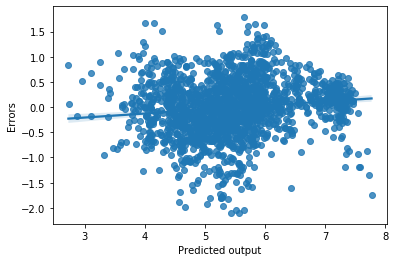

In [74]:
plt.figure()
sns.regplot(y = model.resid, x = model.fittedvalues);   # residual plot
plt.xlabel('Predicted output')
plt.ylabel('Errors');

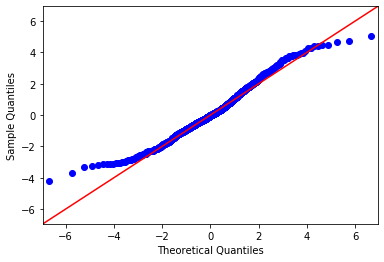

In [44]:
fig = sm.qqplot( model.resid.values, stats.t,fit=True, line="45")
plt.show()

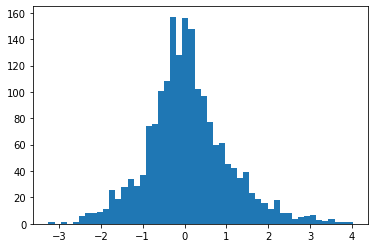

In [50]:
plt.hist( model.resid.values, bins = 50);

**- p-value of F-stat is significant and based upon adjusted R^2 value, predictors are explaining 98.9% of the variation in ladder score, and each predictor is significant as well, given the p-value of t-stat for each predcitor.**

In [13]:
# Predicting on test data
y_pred = model.predict(df_test_X)

In [23]:
from sklearn.metrics import mean_squared_error as mse

In [15]:
# Checking model's performance
mean_sq_err = mse(df_test_Y, y_pred)
ml = (np.sum((df_test_Y - df_test_Y.mean())**2))/len(df_test_Y)
print(f'Baseline model result (sum(y-ybar)^2)/n : {ml}')
print(f'mean sq err = {mean_sq_err} and rmse = {np.sqrt(mean_sq_err)}')

Baseline model result (sum(y-ybar)^2)/n : 1.1455714774109274
mean sq err = 0.3183507480968029 and rmse = 0.5642257953131911


In [16]:
test_pred = test.copy()
test_pred["Predicted Ladder Score"] = y_pred
test_pred.reset_index(inplace = True)

In [17]:
test_pred.loc[50:60, ["Country name", "Ladder score", "Predicted Ladder Score"]]

,Country name,Ladder score,Predicted Ladder Score
50,Latvia,6.032,5.938789
51,Colombia,6.012,5.565711
52,Hungary,5.992,5.911963
53,Thailand,5.985,5.935255
54,Nicaragua,5.972,5.656162
55,Japan,5.940,6.303117
56,Argentina,5.929,5.805673
57,Portugal,5.929,5.898572
58,Honduras,5.919,5.383985
59,Croatia,5.882,5.842950


**- I will check correlation matrix**

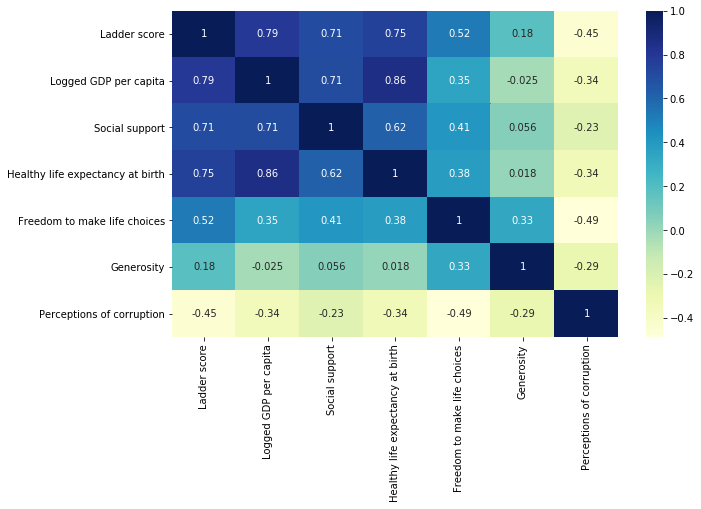

In [466]:
fig, ax = plt.subplots(figsize = [10,6])
sns.heatmap(df_train.corr(), annot= True, cmap = "YlGnBu");

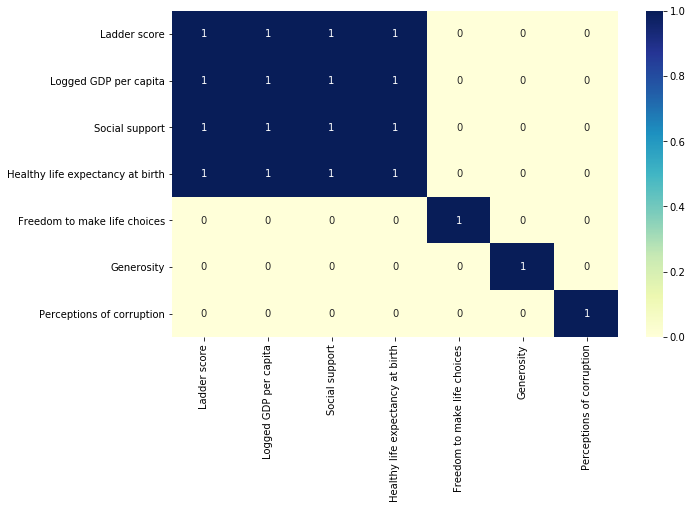

In [167]:
fig, ax = plt.subplots(figsize = [10,6])
sns.heatmap(abs(df_train.corr())>0.6, annot= True, cmap = "YlGnBu");

**- Except Generosity, all the features have corelation with one or more feature - Problem of multicollinearity. So I will do PCA to create independent set of features and check the result**

## CASE 2 : PCA (first data is scaled using Standard scaling)

- For PCA, I will first standardize all features

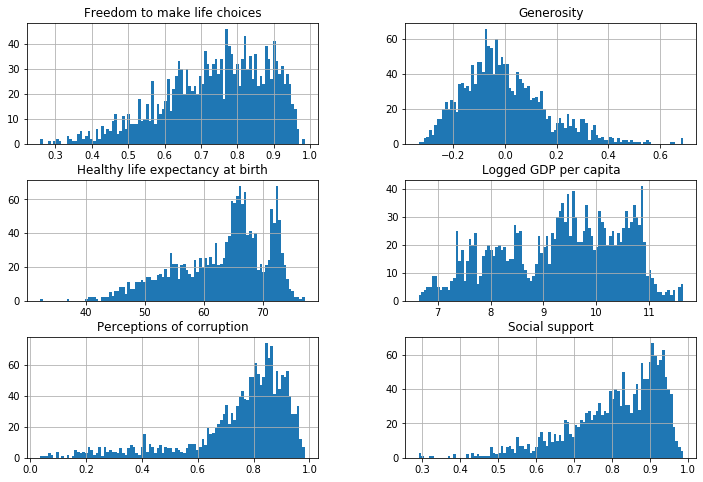

In [71]:
df_train_X.hist(bins=100, figsize=(12,8));  # Distribution of features of train set

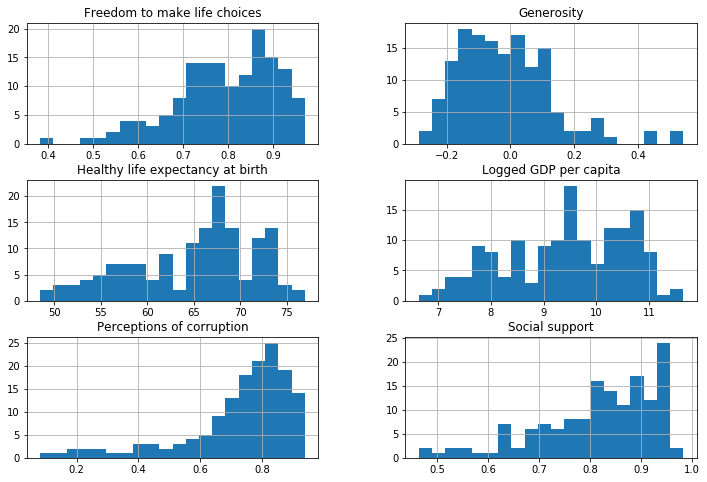

In [72]:
df_test_X.hist(bins=20, figsize=(12,8));  # Distribution of features of test set

**- Distribution of features in train and test test is similar. So, I will standardize features for both train and test data**

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
# Applying standard scaler on both train and test data features
scaler = StandardScaler()

scaler.fit(df_train_X)
X_df_train = scaler.transform(df_train_X)
X_df_test = scaler.transform(df_test_X)

In [77]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=3,  random_state=1234) 
# Value .95 for the number of components parameter.
#It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [78]:
train_X = pca.fit_transform(X_df_train)
test_X = pca.transform(X_df_test)

In [79]:
train_X_df = pd.DataFrame(data= train_X, columns=[f"PC{i}" for i in range(train_X.shape[1])])
train_X_df.head()
test_X_df  = pd.DataFrame(data= test_X, columns=[f"PC{i}" for i in range(test_X.shape[1])])

In [80]:
train_X_df.describe()

,PC0,PC1,PC2
count,1.712000e+03,1.712000e+03,1.712000e+03
mean,-1.400749e-17,1.280777e-17,-1.280615e-16
std,1.725703e+00,1.162706e+00,8.132800e-01
min,-4.092745e+00,-3.286072e+00,-3.021540e+00
25%,-1.002441e+00,-8.758567e-01,-4.809166e-01
50%,1.458995e-02,-1.799868e-02,-1.665781e-02
75%,1.232038e+00,8.348488e-01,4.676103e-01
max,5.543458e+00,3.998686e+00,3.389886e+00


In [81]:
# adding a constant column to the PC -> y =a+ b1 x1 + b2 x2 , so constant column of 1 adding so that it can show intercept too

train_X_df = sm.add_constant(train_X_df)   
train_X_df.head()
test_X_df = sm.add_constant(test_X_df)

In [84]:
pca.explained_variance_, np.sum(pca.explained_variance_ratio_)

(array([2.97804982, 1.35188455, 0.6614243 ]), 0.8314071926962916)

In [85]:
# Fitting the Multiple Linear Regression model
model_pca = sm.OLS(df_train_Y, train_X_df).fit()

In [86]:
pred_y = model_pca.predict(test_X_df)

In [87]:
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     1703.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:15:25   Log-Likelihood:                -1462.1
No. Observations:                1712   AIC:                             2932.
Df Residuals:                    1708   BIC:                             2954.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4450      0.014    395.899      0.0

**- p-value of F-stat is significant and based upon adjusted R^2 value, predictors are explaining 75.0% of the variation in ladder score, and each predictor is significant as well, given the p-value of t-stat for each predcitor (Principal components in this case)**

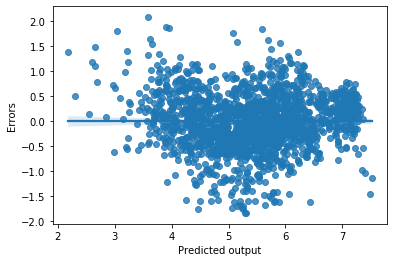

In [88]:
plt.figure()
sns.regplot(y = model_pca.resid, x = model_pca.fittedvalues);   # residual plot
plt.xlabel('Predicted output')
plt.ylabel('Errors');

In [89]:
mean_sq_err = mse(df_test_Y, pred_y)
ml = (np.sum((df_test_Y - df_test_Y.mean())**2))/len(df_test_Y)
print(f'Baseline model result (sum(y-ybar)^2)/n : {ml}')
print(f'mean sq err = {mean_sq_err} and rmse = {np.sqrt(mean_sq_err)}')

Baseline model result (sum(y-ybar)^2)/n : 1.1455714774109274
mean sq err = 0.29393172841904014 and rmse = 0.5421547089337508


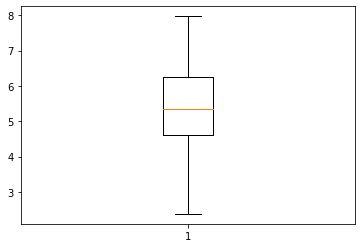

In [90]:
plt.boxplot(df_train_Y);  # to check if there are any outliers in the response 

In [91]:
from scipy import stats

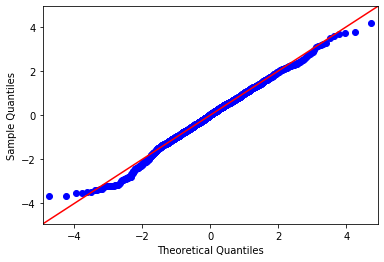

In [92]:
fig = sm.qqplot( model_pca.resid.values, stats.t,fit=True, line="45")
plt.show()

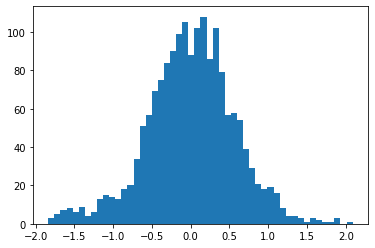

In [93]:
plt.hist(model_pca.resid.values , bins = 50);

## CASE 3: USING ROBUST SCALING AND THEN DOING PCA

- Since some of the features have outliers, so I will also try with robust scaling and check the results.

In [94]:
from sklearn.preprocessing import RobustScaler

rob = RobustScaler()
X_df_train = rob.fit_transform(df_train_X)
X_df_test = rob.transform(df_test_X)

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3,  random_state=250) 

In [96]:
train_X = pca.fit_transform(X_df_train)
test_X = pca.transform(X_df_test)

In [97]:
train_X_df = pd.DataFrame(data= train_X, columns=[f"PC{i}" for i in range(train_X.shape[1])])
test_X_df  = pd.DataFrame(data= test_X, columns=[f"PC{i}" for i in range(test_X.shape[1])])

In [98]:
# adding a constant column to the PC -> y =a+ b1 x1 + b2 x2 , so constant column of 1 adding so that it can show intercept too

train_X_df = sm.add_constant(train_X_df)   
test_X_df = sm.add_constant(test_X_df)

In [99]:
pca.explained_variance_, np.sum(pca.explained_variance_ratio_)

(array([1.74422439, 0.87176798, 0.5280896 ]), 0.8583218139222475)

In [100]:
# Fitting the Multiple Linear Regression model
model_pca1 = sm.OLS(df_train_Y, train_X_df).fit()

In [101]:
pred_y = model_pca1.predict(test_X_df)

In [102]:
print(model_pca1.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     1680.
Date:                Fri, 23 Jul 2021   Prob (F-statistic):               0.00
Time:                        02:16:38   Log-Likelihood:                -1470.8
No. Observations:                1712   AIC:                             2950.
Df Residuals:                    1708   BIC:                             2971.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4450      0.014    393.883      0.0

**- p-value of F-stat is significant and based upon adjusted R^2 value, predictors are explaining 74.6% of the variation in ladder score, and each predictor is significant as well, given the p-value of t-stat for each predcitor (Principal component in this case)**

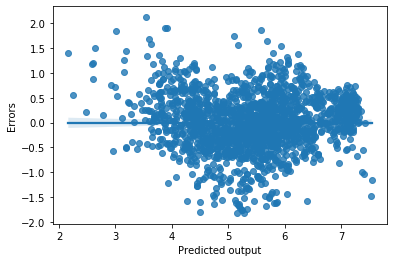

In [104]:
plt.figure()
sns.regplot(y = model_pca1.resid, x = model_pca1.fittedvalues);   # residual plot
plt.xlabel('Predicted output')
plt.ylabel('Errors');

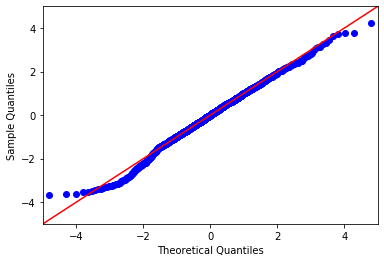

In [105]:
fig = sm.qqplot( model_pca1.resid.values, stats.t,fit=True, line="45")
plt.show()

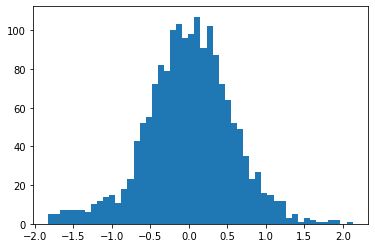

In [106]:
plt.hist(model_pca1.resid.values , bins = 50);

In [107]:
mean_sq_err = mse(df_test_Y, pred_y)
ml = (np.sum((df_test_Y - df_test_Y.mean())**2))/len(df_test_Y)
print(f'Baseline model result (sum(y-ybar)^2)/n : {ml}')
print(f'mean sq err = {mean_sq_err} and rmse = {np.sqrt(mean_sq_err)}')

Baseline model result (sum(y-ybar)^2)/n : 1.1455714774109274
mean sq err = 0.29581979238887274 and rmse = 0.5438931810464925


- Comparing the mse and rmse results with that of standard scaler, they are not that different.

## CONCLUSION

- I have done statistical tests like hypothesis, anova and chi-sqaure to understand the relation and significance of different features with each other.

**I have done multiple regression using the data of countries till 2020 to predict the ladder score (happiness score) of countries for 2021. I have used features : logged gdp, social support, freedom to make life choices, perceptions of corruption, health life expectancy at birth and generosity to predict the response variable : "ladder score" and have evaluated the model using metric "Mean squared error"**

- Since there is multicollinearity in the data, so I have created independent features using PCA. Using PCA, MSE of the model improves a little bit.
- I have attempted using 2 feature scaling methods while doing PCA: Standard scaling and Robust Scaling. Adjusted R square and MSE vary only a bit using the two methods.

- Based on the regression and statistical tests, we see that each of these features are significant in determining the happiness score of a country and are also correlated with each other. It helps to gain insights about the social and developmental aspects of the countries and how happy citizens of the countries really are and how each of these features are important in determining it.
- The correlated factors could be studied together for better understanding and creating a positive impact in the future.